# Análisis de Clientes y Marketing en Showz

# Descripción del proyecto

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

- registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.

Lo que vas a investigar: 

- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.

##  Inicialización

In [9]:
# Cargamos librerias.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats as st
import numpy as np

##  Cargar datos

In [10]:
# Cargamos los archivos de datos.
gastos = pd.read_csv('data/data/costs_us.csv')
pedidos = pd.read_csv('data/data/orders_log_us.csv')
visitas = pd.read_csv('data/data/visits_log_us.csv')


##  Preparar los datos

In [11]:
# Vista previa de los datos.
print(gastos.head())
print()
print(gastos.info())
print()
print('Numero de filas duplicadas:',gastos.duplicated().sum())

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

Numero de filas duplicadas: 0


In [12]:
# La columna 'dt' esta en formato de objeto, la modificaremos a cadena de formato de fecha.
gastos['dt'] = pd.to_datetime(gastos['dt'])

In [13]:
# Vista previa de los datos.
print(pedidos.head())
print()
print(pedidos.info())
print()
print('Numero de filas duplicadas:',pedidos.duplicated().sum())

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Numero de filas duplicadas: 0


In [14]:
# Modificaremos todas las letras de las columnas a minusculas, tambien el tipo de dato en 'buy ts' a tipo fecha.
pedidos.columns = pedidos.columns.str.lower()
pedidos['buy ts'] = pd.to_datetime(pedidos['buy ts'])
pedidos.columns = [col.replace(' ','_') for col in pedidos.columns]

In [15]:
# Vista previa de los datos.
print(visitas.head())
print()
print(visitas.info())
print()
print('Numero de filas duplicadas:',visitas.duplicated().sum())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usag

In [16]:
# Modificaremos todas las letras de las columnas a minusculas, tambien el tipo de dato en 'end ts' y 'start ts' a tipo fecha
visitas.columns = visitas.columns.str.lower()
visitas['end ts'] = pd.to_datetime(visitas['end ts'])
visitas['start ts'] = pd.to_datetime(visitas['start ts'])
visitas.columns = [col.replace((' '), ('_')) for col in visitas.columns]

##  Informes y calcula métricas de visitas

### ¿Cuántas personas lo usan cada día, semana y mes?

In [17]:
# DAU ("Daily Active Users"):
# WAU ("Weekly Active Users"):
# MAU ("Monthly Active Users"):

# Estas columnas brindan la información del calendario ISO para cada valor de datetime, lo que facilita el análisis o la visualización, según los parámetros del calendario ISO.

visitas['year_ts'] = visitas['start_ts'].dt.isocalendar().year
visitas['month_ts'] = visitas['start_ts'].dt.month
visitas['week_ts'] = visitas['start_ts'].dt.isocalendar().week
visitas['date_ts'] = visitas['start_ts'].dt.date

dau = visitas.groupby('date_ts').agg({'uid':'nunique'})
wau = visitas.groupby(['year_ts', 'week_ts']).agg({'uid': 'nunique'})
mau = visitas.groupby(['year_ts','month_ts']).agg({'uid':'nunique'})

In [18]:
print('Cuantas personas lo usan cada dia:', (int(dau.mean())))
print('Cuantas personas lo usan cada semana:', (int(wau.mean())))
print('Cuantas personas lo usan cada mes:', (int(mau.mean())))

Cuantas personas lo usan cada dia: 907
Cuantas personas lo usan cada semana: 5716
Cuantas personas lo usan cada mes: 23228


/var/folders/y8/f0jgdbxx0ln8rkqv0wph8qnw0000gn/T/ipykernel_93217/3054797318.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Cuantas personas lo usan cada dia:', (int(dau.mean())))
/var/folders/y8/f0jgdbxx0ln8rkqv0wph8qnw0000gn/T/ipykernel_93217/3054797318.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Cuantas personas lo usan cada semana:', (int(wau.mean())))
/var/folders/y8/f0jgdbxx0ln8rkqv0wph8qnw0000gn/T/ipykernel_93217/3054797318.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Cuantas personas lo usan cada mes:', (int(mau.mean())))


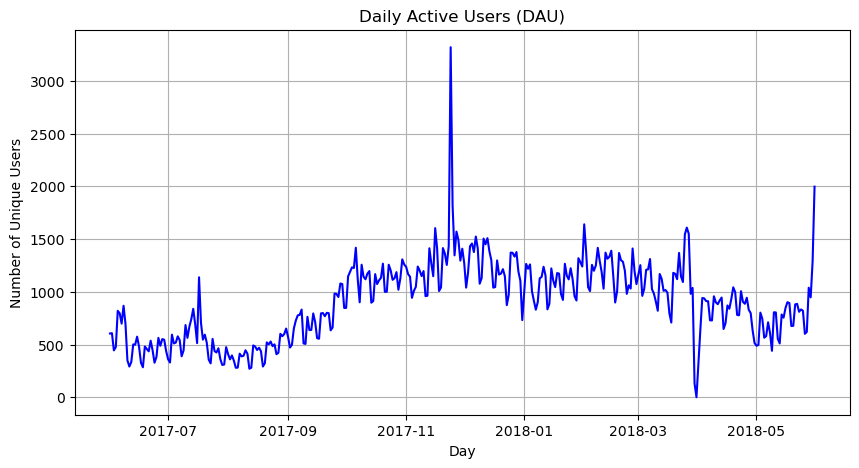

In [19]:
# Crearemos un gráfico para 'DAU'
plt.figure(figsize=(10, 5))
plt.plot(dau, color='blue', linestyle='-')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Day')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.show()


**Notas:** Durante el periodo de análisis, se observa una tendencia creciente en el número de usuarios activos diarios (DAU) en la plataforma Showz, especialmente hacia finales de 2017, lo que puede estar relacionado con campañas de marketing o eventos de alta demanda. Destacan dos picos importantes: uno en noviembre de 2017 y otro a mediados de 2018. Sin embargo, también se detectan caídas atípicas que podrían deberse a problemas técnicos o eventos fuera del control del negocio, lo cual sugiere que debe revisarse la calidad de los datos o eventos externos en esas fechas.

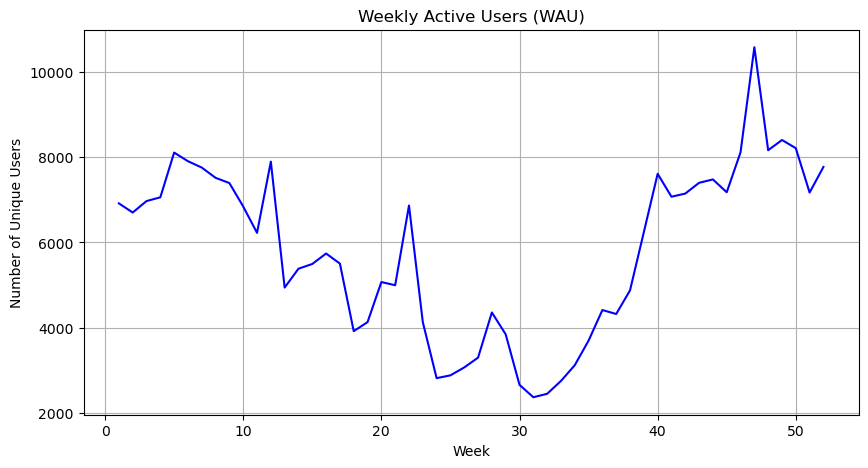

In [20]:
# Crearemos un grafico para 'WAU'
wau_grafica = visitas.groupby('week_ts')['uid'].nunique()

plt.figure(figsize=(10, 5))
plt.plot(wau_grafica, color='blue', linestyle='-')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.show()


**Notas:** El análisis semanal de usuarios activos (WAU) muestra una disminución progresiva entre las semanas 10 y 30, con un punto mínimo en la semana 31. A partir de ahí, se da una recuperación constante, alcanzando un máximo pico en la semana 47, lo que sugiere un evento o campaña de alto impacto. Este comportamiento refuerza la idea de que el último trimestre del año concentra mayor actividad, y permite observar patrones más puntuales que pueden ser útiles para optimizar la distribución semanal del presupuesto de marketing.

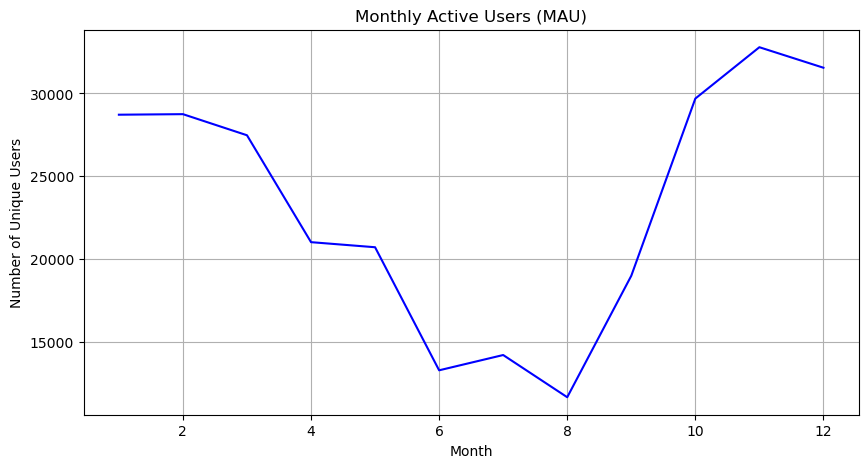

In [21]:
# Crearemos un grafico para 'MAU'
mau_grafica = visitas.groupby('month_ts')['uid'].nunique()

plt.figure(figsize=(10, 5))
plt.plot(mau_grafica, color='blue', linestyle='-')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.show()


**Notas:** A lo largo del año, se observa un comportamiento estacional en la cantidad de usuarios activos mensuales (MAU). El uso del servicio disminuye de marzo a agosto, lo que puede estar relacionado con una baja demanda durante el verano. Sin embargo, a partir de septiembre, se da una recuperación significativa, con un pico en noviembre, posiblemente debido a eventos de alta demanda o campañas promocionales. Este patrón indica que el último trimestre del año es el más activo, lo cual es importante para planificar campañas de marketing y asignar presupuestos estratégicamente.

In [22]:
# Obtendremos cuantas sessiones hay por dia (se considera que cada usuario puede tener mas de una session).

day_sessions = visitas.groupby('date_ts').agg({'uid':'count'}).mean()

print('Cuantas sesiones hay por dia:', (int(day_sessions)))

Cuantas sesiones hay por dia: 987


/var/folders/y8/f0jgdbxx0ln8rkqv0wph8qnw0000gn/T/ipykernel_93217/1743657028.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Cuantas sesiones hay por dia:', (int(day_sessions)))


In [23]:
# Obtendremos cual es la duracion promedio de cada sesión.

visitas['duration_ts_sec'] = (visitas['end_ts'] - visitas['start_ts']).dt.seconds
print('Duracion promedio de cada sesion:', (visitas['duration_ts_sec'].mean()))

Duracion promedio de cada sesion: 643.506488592098


In [24]:
# Obtendremos con que frecuencia los usuarios regresan mensualmente.

session_per_user = visitas.groupby(['year_ts', 'month_ts']).agg({'uid':['count', 'nunique']})
session_per_user.columns = ['n_sessions', 'n_users']
session_per_user['session_per_user'] = (session_per_user['n_sessions'] / session_per_user['n_users'])
session_per_user

n_sessions  n_users  session_per_user
year_ts month_ts                                       
2017    6              16505    13259          1.244815
        7              17828    14183          1.256998
        8              14355    11631          1.234202
        9              23907    18975          1.259921
        10             37903    29692          1.276539
        11             43969    32797          1.340641
        12             41983    31557          1.330386
2018    1              36939    28716          1.286356
        2              37182    28749          1.293332
        3              35679    27473          1.298693
        4              26515    21008          1.262138
        5              26635    20701          1.286653

#### Conclusión de las visitas en Showz

Actividad del Usuario (DAU, WAU, MAU):

Los cálculos indican que el DAU promedio es de 907 usuarios, el WAU promedio es de 5716 usuarios, y el MAU promedio es de 23228 usuarios. Esto muestra que mientras tienes una base sólida de usuarios mensuales.

Frecuencia de Reingreso:

La diferencia entre el número de sesiones y el número de usuarios únicos diarios es relativamente pequeña (987 sesiones vs. 907 usuarios), lo que sugiere que no hay una gran cantidad de usuarios que regresan varias veces al día. 

La duración promedio de las sesiones es de 643 segundos (aproximadamente 10.7 minutos), lo cual es bastante tiempo (por ejemplo, si es un proceso de compra de entradas), podría haber espacio para optimizar y acelerar ciertas interacciones.

Retorno de Usuarios:

Los usuarios regresan al sitio aproximadamente 1.24 a 1.34 veces al mes, lo cual es relativamente bajo para un sitio de eventos, donde podrías esperar una mayor frecuencia de visita especialmente en temporadas altas de eventos. Esto sugiere que las estrategias para aumentar la frecuencia de visitas podrían incluir promociones dirigidas, recordatorios de eventos próximos.

##  Informes y calcula métricas de ventas

In [25]:
# Nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente.
first_purchase = pedidos.groupby('uid')['buy_ts'].min()
first_purchase.name = 'first_purchase'

# Convertir la serie en un DataFrame para unir más fácilmente.
first_purchase_df = first_purchase.reset_index()

# Usar merge para unir 'pedidos' con 'first_buy_df'.
pedidos = pedidos.merge(first_purchase_df, on='uid', how='left')

# Obtendremos el registro del usuario.
registration = visitas.groupby('uid')['start_ts'].min()
registration.name = 'registration'
registration_df = registration.reset_index()

# Unimos las nuevas columnas con el registro y la primera compra del usuario.
visitas = visitas.merge(first_purchase_df, on='uid', how='left')
visitas = visitas.merge(registration_df, on='uid', how='left')

# Creamos una nueva columna para saber los dias que tardaron para la conversion.
visitas['days_to_conversion'] = (visitas['first_purchase'] - visitas['registration']).dt.days

# Crearemos una funcion para categorizar la conversión basada en los días hasta la conversión.
def categorize_conversion(days):
    if pd.isna(days):
        return 'No convesion'
    elif pd == 0:
        return 'Conversion 0d'
    else:
        return f'conversion {int(days)}d'
    
# Aplicamos la funcion para crear la columna 'conversion_category'
visitas['conversion_category'] = visitas['days_to_conversion'].apply(categorize_conversion)

In [26]:
# Ordenar y contar las categorías de conversión
conversion_counts = visitas['conversion_category'].value_counts().sort_index().sort_values(ascending=False)
print(conversion_counts.head(10))

# Llenar valores faltantes en 'days_to_conversion'
visitas['days_to_conversion'].fillna(-1, inplace=True)

conversion_category
No convesion      262006
conversion 0d      48416
conversion 1d       3864
conversion 4d       2183
conversion 2d       1925
conversion 3d       1563
conversion 6d       1424
conversion 5d       1169
conversion 21d       775
conversion 20d       773
Name: count, dtype: int64


/var/folders/y8/f0jgdbxx0ln8rkqv0wph8qnw0000gn/T/ipykernel_93217/2781274773.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  visitas['days_to_conversion'].fillna(-1, inplace=True)


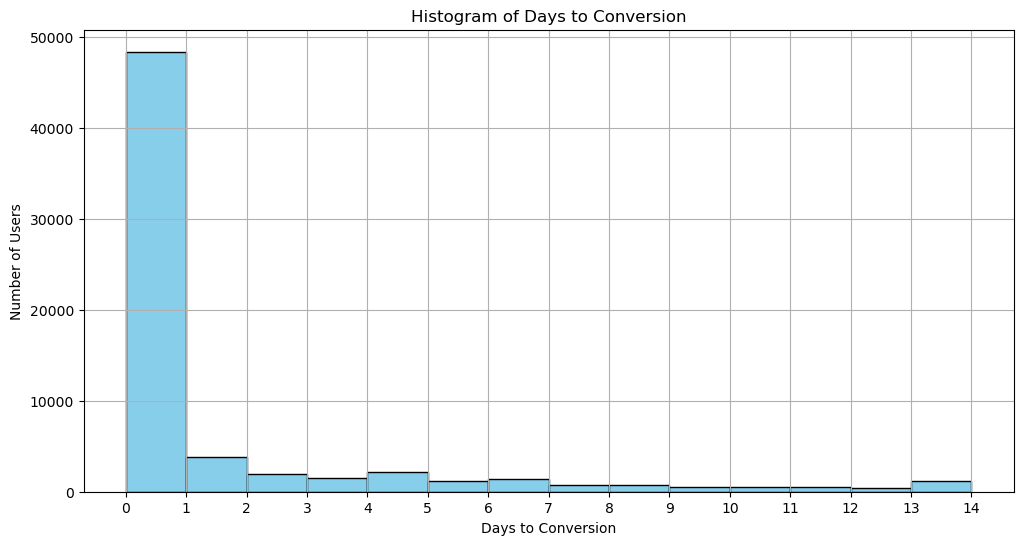

In [27]:
# Configurar el gráfico de dias para conversion.
plt.figure(figsize=(12, 6))
plt.hist(visitas['days_to_conversion'], bins=range(0, 15, 1), color='skyblue', edgecolor='black')

# Configurar títulos y etiquetas.
plt.title('Histogram of Days to Conversion')
plt.xlabel('Days to Conversion')
plt.ylabel('Number of Users')
plt.xticks(range(0, 15, 1))  # Ajustar según los rangos de interés

# Mostrar el gráfico
plt.grid(True)
plt.show()

**Notas:** El histograma de días hasta la conversión muestra que la mayoría de los usuarios convierten el mismo día en que realizan su primera visita a la plataforma, lo que indica un proceso de conversión altamente eficiente e inmediato. A partir del segundo día, la tasa de conversión cae de manera significativa. Esto sugiere que las decisiones de compra en Showz son mayormente impulsivas o bien motivadas por una necesidad puntual (como entradas urgentes). En términos de marketing, vale la pena enfocar esfuerzos en mejorar la conversión inmediata, ya que las probabilidades de conversión disminuyen drásticamente después del primer día.

### ¿cuántos pedidos se realizan cada mes?

In [28]:
# Para calcular cuántos pedidos se realizan cada mes.
orders_per_month = pedidos.groupby(pd.Grouper(key='buy_ts', freq='M')).size()

# Convertir el índice de 'orders_per_month' para que solo muestre año y mes.
orders_per_month.index = orders_per_month.index.strftime('%Y-%m')

orders_per_month

/var/folders/y8/f0jgdbxx0ln8rkqv0wph8qnw0000gn/T/ipykernel_93217/499785831.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = pedidos.groupby(pd.Grouper(key='buy_ts', freq='M')).size()


buy_ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
dtype: int64

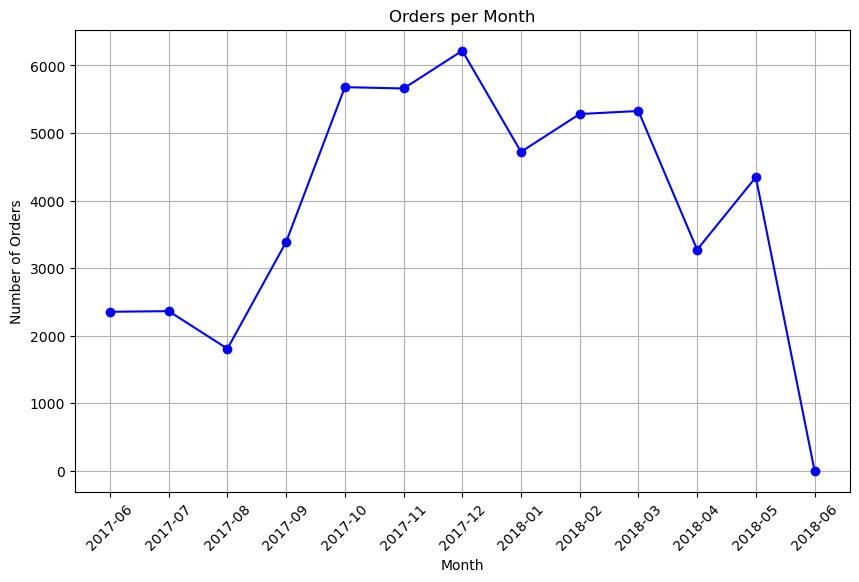

In [29]:
# Creamos un grafico de ordenes mensuales para visualizar mejor.

plt.figure(figsize=(10,6))
plt.plot(orders_per_month, marker='o', color='b')
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Notas:** El volumen mensual de pedidos muestra un aumento constante desde mediados de 2017, alcanzando su punto máximo en diciembre de ese año. Este comportamiento podría estar influenciado por estrategias de marketing efectivas o una mayor concentración de eventos relevantes en esa época. En 2018, se observa una tendencia a la baja, con una caída significativa en abril y un repunte en mayo. La abrupta caída en junio puede deberse a un registro parcial de datos. 

### ¿Cuál es el tamaño promedio de compra?

In [30]:
# Tamaño promedio de compra.

avg_revenue_per_purchase = pedidos['revenue'].mean()
print('Tamaño promedio de compra:', avg_revenue_per_purchase)

Tamaño promedio de compra: 4.999646930477041


In [31]:
# Tamaño promedio de compra por cada mes.
avg_revenue_per_purchase_per_month = pedidos.groupby(pd.Grouper(key='buy_ts', freq='M'))['revenue'].mean()

/var/folders/y8/f0jgdbxx0ln8rkqv0wph8qnw0000gn/T/ipykernel_93217/702125996.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_revenue_per_purchase_per_month = pedidos.groupby(pd.Grouper(key='buy_ts', freq='M'))['revenue'].mean()


In [32]:
avg_revenue_per_purchase_per_month

buy_ts
2017-06-30    4.060106
2017-07-31    5.306589
2017-08-31    4.847139
2017-09-30    5.416448
2017-10-31    4.928280
2017-11-30    4.783518
2017-12-31    5.852139
2018-01-31    4.112927
2018-02-28    4.840095
2018-03-31    5.413930
2018-04-30    5.150645
2018-05-31    4.771279
2018-06-30    3.420000
Freq: ME, Name: revenue, dtype: float64

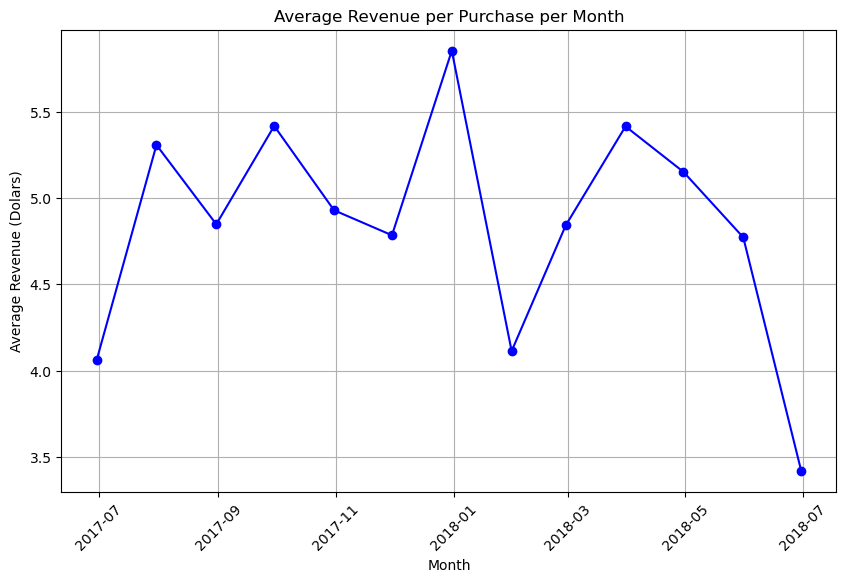

In [33]:
# Creamos un grafico de el tamaño promedio de compra por cada mes.
plt.figure(figsize=(10,6))
plt.plot(avg_revenue_per_purchase_per_month, marker='o', color='b')
plt.title('Average Revenue per Purchase per Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue (Dolars)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Notas:** El ingreso promedio por compra ha sido relativamente estable durante el periodo analizado, manteniéndose mayormente por encima de los $4.80 USD. El pico más alto se registra en enero de 2018, lo que podría estar relacionado con eventos de mayor valor o menor cantidad de compras con tickets baratos. Por el contrario, la caída abrupta en julio de 2018 podría deberse a datos incompletos.

In [34]:
# Calcularemos LTV (valor del ciclo de vida del cliente) es la cantidad total de dinero que un cliente aporta a la empresa en promedio al realizar compras.

ltv = pedidos.groupby('uid')['revenue'].sum().mean()
print('beneficio del ciclo de vida del cliente:',ltv)

beneficio del ciclo de vida del cliente: 6.901327930345262


#### Conclusión general del Análisis de Ventas

Objetivo del Análisis: El análisis se centró en comprender el comportamiento de compra de los usuarios desde el momento de su registro hasta su conversión en clientes, evaluando la frecuencia de compras y el valor económico que aportan durante su interacción con la empresa.


Conversión de Usuarios:

Se identificó el tiempo que transcurre desde el registro de un usuario hasta su primera compra, categorizando esta conversión en intervalos diarios como 'Conversion 0d', 'Conversion 1d', etc.
Se utilizó una combinación de datos de los DataFrames pedidos y visitas para determinar el momento del registro y de la primera compra, y así calcular los días hasta la conversión.
Frecuencia de Pedidos:

Se analizó la cantidad de pedidos realizados mensualmente para detectar tendencias y patrones que pudieran influir en las estrategias de marketing y ventas.
Valor Promedio de las Compras:

Se calculó el tamaño promedio de compra, tanto de manera general como desglosado por mes, proporcionando insights sobre la variabilidad en el gasto de los consumidores y la efectividad de las políticas de precios.
Visualización de Datos:

Se elaboraron gráficos para representar visualmente los pedidos por mes y el tamaño promedio de compra, facilitando la interpretación y la presentación de los datos.
Valor del Ciclo de Vida del Cliente (LTV):

Se estimó el LTV para entender el valor económico total que un cliente promedio aporta a lo largo de su relación con la empresa.

Hallazgos Clave:

- Conversión de Usuarios: La mayoría de las conversiones ocurren el mismo día del registro, destacando la eficacia de las tácticas inmediatas de conversión.

- Frecuencia de Pedidos: Existen patrones estacionales y eventos que impactan significativamente en la cantidad de pedidos.

- Valor Promedio de las Compras: Se observaron fluctuaciones en el gasto promedio, lo que puede indicar oportunidades para optimizar las estrategias de precios.

- LTV: El valor promedio del ciclo de vida del cliente proporciona una base para ajustar las estrategias de adquisición y retención de clientes.

## Informes y calcula métricas de marketing

In [35]:
# Calculamos cuánto dinero se gastó en marketing a lo largo del tiempo.

total_marketing_cost = gastos['costs'].sum()
print('Total dinero gastado en marketing:', total_marketing_cost) 

Total dinero gastado en marketing: 329131.62


In [36]:
# Calculamos cuánto dinero se gastó por fuente de adquisición a lo largo del tiempo.

marketing_cost_per_source = gastos.groupby('source_id')['costs'].sum()
marketing_cost_per_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

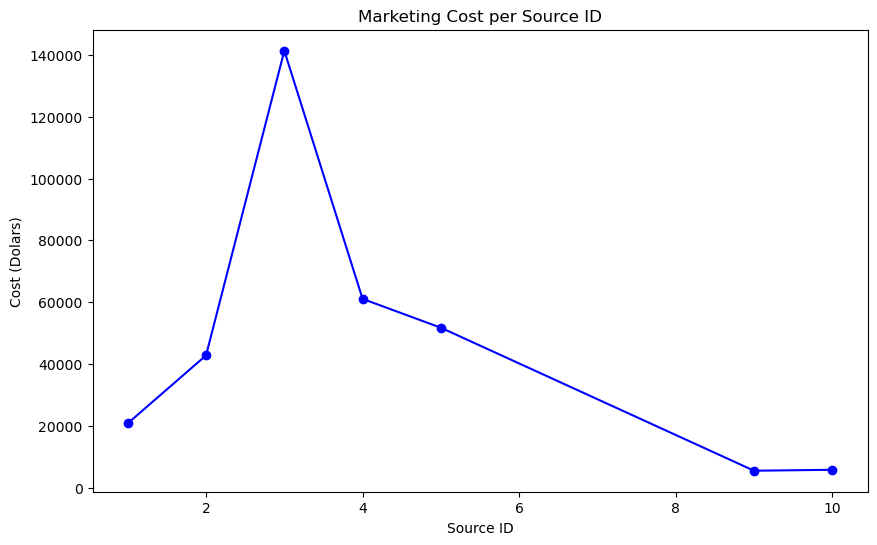

In [37]:
# Graficaremos el gasto por fuente de adquisición.

plt.figure(figsize=(10,6))
plt.plot(marketing_cost_per_source, marker='o', color='blue')
plt.title('Marketing Cost per Source ID')
plt.xlabel('Source ID')
plt.ylabel('Cost (Dolars)')
plt.show()


**Notas:** El análisis del costo por canal de adquisición muestra que la mayor inversión de marketing se concentró en Source ID 3, con un gasto superior a los $140,000 USD, lo que representa una diferencia considerable frente a los demás canales. A partir de Source ID 6, los gastos se reducen drásticamente. Esta distribución sugiere que la estrategia de marketing se enfocó principalmente en pocos canales, especialmente el ID 3, lo que puede representar una oportunidad o un riesgo, dependiendo del retorno que estén generando. Es fundamental comparar estos costos con los ingresos o conversiones atribuibles a cada canal para evaluar su eficiencia real y optimizar la asignación del presupuesto.

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [38]:
# Calcularemos el costo de adquisición de clientes para cada una de las fuentes.
# unir el dataframe visitas y el de pedidos.

conversion = pd.merge(visitas, pedidos, on='uid', how='inner')

# calcular los ingresos totales por 'uid'.

total_revenue_per_user = pedidos.groupby('uid')['revenue'].sum()

# Contar el número de clientes únicos adquiridos por fuente

clients_per_source = conversion.groupby('source_id')['uid'].nunique()

# Calcular el CAC por fuente.

cac_per_source = marketing_cost_per_source / clients_per_source
cac_per_source.fillna(0)

source_id
1      2.918642
2      5.859828
3     10.206676
4      4.284965
5      5.096209
7      0.000000
9      1.975471
10     3.283976
dtype: float64

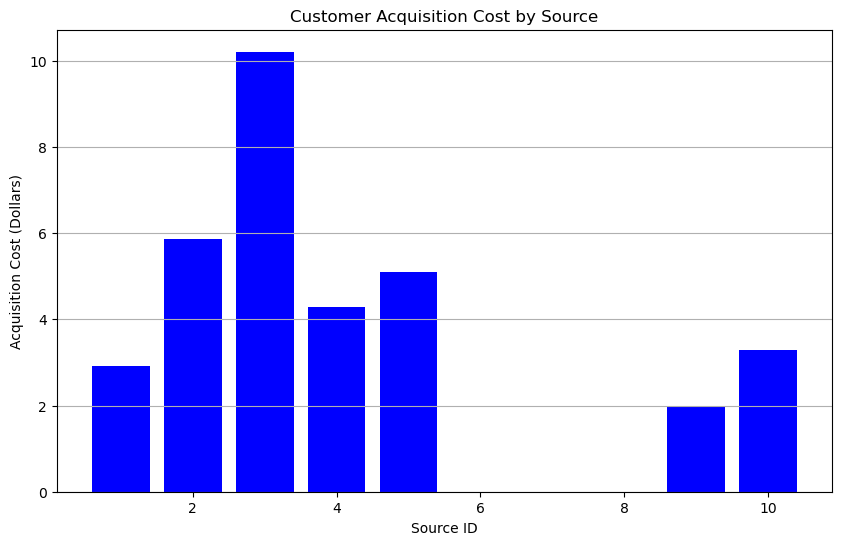

In [39]:
# Extraemos los valores para poderlos graficar.

source_ids = cac_per_source.index
cac_values = cac_per_source.values

# Graficaremos el 'CAC por fuente' para una una mejor visualizacion.

plt.figure(figsize=(10, 6))
plt.bar(source_ids, cac_values, color='blue')
plt.title('Customer Acquisition Cost by Source')
plt.xlabel('Source ID')
plt.ylabel('Acquisition Cost (Dollars)')
plt.grid(axis='y')
plt.show()

**Notas:** El análisis del costo de adquisición por canal (CAC) revela que Source ID 3 es el canal más costoso, con un CAC superior a los $10 USD, lo que podría no ser rentable si no está generando usuarios de alto valor. En contraste, otros canales como los IDs 1, 2, 4, 5 y 10 presentan CACs mucho más bajos, entre $3 y $6 USD, lo cual puede representar mejores oportunidades de optimización.

### ¿Cuán rentables eran las inversiones? (ROMI)

In [40]:
# Sumar los costos por 'source_id' en el DataFrame de gastos.

total_costs = gastos.groupby('source_id')['costs'].sum()

# Obtenermos el "revenue" por dia para poder calcular el ROMI.

revenue_per_day = pedidos.groupby(pedidos['buy_ts'].dt.date)['revenue'].sum()
revenue_df = revenue_per_day.reset_index()
revenue_df.columns = ['date', 'revenue']

# Mostrar el resultado
print(revenue_df)

           date  revenue
0    2017-06-01   389.46
1    2017-06-02   324.11
2    2017-06-03   166.48
3    2017-06-04   195.21
4    2017-06-05   441.49
..          ...      ...
359  2018-05-28   740.00
360  2018-05-29   491.06
361  2018-05-30  1021.69
362  2018-05-31  4613.92
363  2018-06-01     3.42

[364 rows x 2 columns]


In [41]:

# Agrupar los "costs" por día y sumarlos.

costs_per_day = gastos.groupby(gastos['dt'].dt.date)['costs'].sum().reset_index()
costs_per_day.columns = ['date', 'total_costs']

# Mostrar el resultado
print(costs_per_day.head())

         date  total_costs
0  2017-06-01       735.26
1  2017-06-02       721.19
2  2017-06-03       450.85
3  2017-06-04       761.16
4  2017-06-05       821.44


In [42]:
# Unir los dataframes basados en la columna 'date'

combined_data = pd.merge(revenue_df, costs_per_day, on='date', how='inner')

# Calcular el ROMI
combined_data['ROMI'] = (combined_data['revenue'] - combined_data['total_costs']) / combined_data['total_costs'] * 100

# Mostrar los datos combinados y el ROMI
print(combined_data)

           date  revenue  total_costs        ROMI
0    2017-06-01   389.46       735.26  -47.030982
1    2017-06-02   324.11       721.19  -55.059000
2    2017-06-03   166.48       450.85  -63.074193
3    2017-06-04   195.21       761.16  -74.353618
4    2017-06-05   441.49       821.44  -46.254139
..          ...      ...          ...         ...
358  2018-05-27   374.19       532.87  -29.778370
359  2018-05-28   740.00       619.44   19.462741
360  2018-05-29   491.06       784.79  -37.427847
361  2018-05-30  1021.69      1183.00  -13.635672
362  2018-05-31  4613.92      2153.70  114.232251

[363 rows x 4 columns]


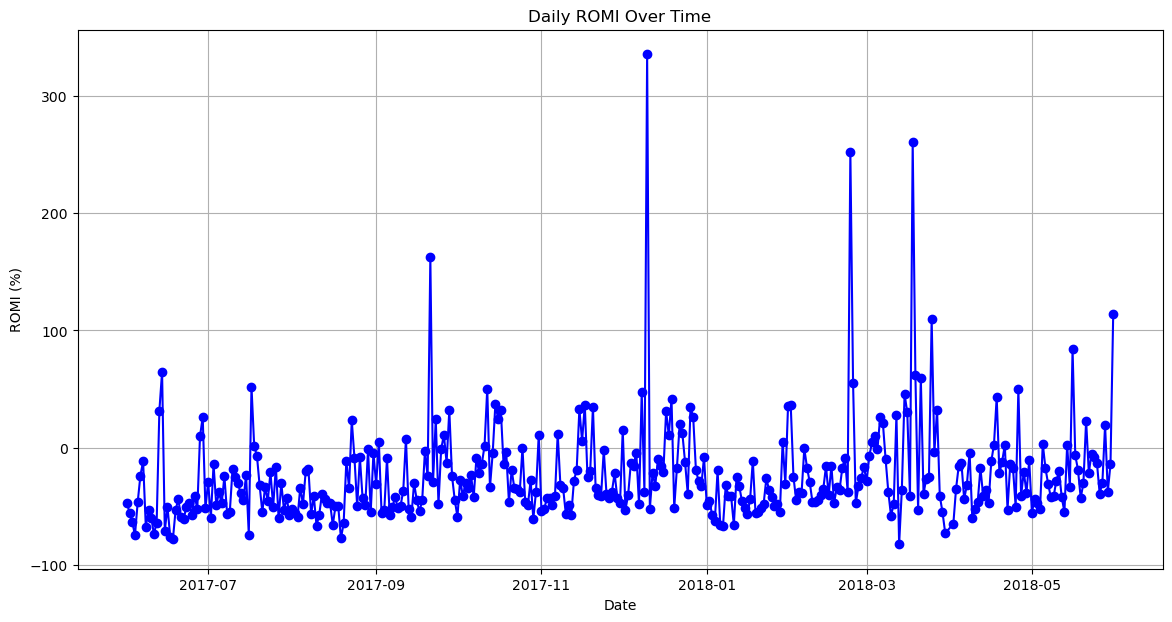

In [43]:
# Grafica para visuzalizar el ROMI diario en el tiempo.
plt.figure(figsize=(14, 7))
plt.plot(combined_data['date'], combined_data['ROMI'], marker='o', linestyle='-', color='blue')
plt.title('Daily ROMI Over Time')
plt.xlabel('Date')
plt.ylabel('ROMI (%)')
plt.grid(True)
plt.show()

**Notas:** El análisis del ROMI diario a lo largo del tiempo revela una alta volatilidad, con numerosos días en los que la inversión en marketing no se recuperó (ROMI < 0), pero también con momentos destacados donde se obtuvo un retorno superior al 100% o incluso 300%. Esta fluctuación sugiere que la eficiencia de las campañas de marketing puede depender en gran medida del día y el tipo de evento promocionado. Identificar los factores que impulsaron los días con ROMI positivo puede permitir replicar estrategias exitosas, mientras que analizar los días negativos puede ayudar a evitar pérdidas innecesarias en futuras campañas.

### Calcular el CAC 

In [44]:
# Calcularemos el CAC para varios dispositivos y fuentes de anuncios. 
merged_data = pd.merge(visitas, pedidos, on='uid', how='inner')

merged_data = merged_data[merged_data['buy_ts'].dt.date == merged_data['start_ts'].dt.date]

# Agrupar los ingresos por dispositivo y fuente
revenue_per_device_source = merged_data.groupby(['device', 'source_id', merged_data['buy_ts'].dt.date])['revenue'].sum().reset_index()
revenue_per_device_source.columns = ['device', 'source_id', 'date', 'revenue']

# Agrupar costos por fuente y fecha.
costs_per_day_source = gastos.groupby(['source_id', gastos['dt'].dt.date])['costs'].sum().reset_index()
costs_per_day_source.columns = ['source_id', 'date', 'costs']

analysis_data = pd.merge(revenue_per_device_source, costs_per_day_source, on=['source_id', 'date'])

# Calcular el número de nuevos clientes por dispositivo y fuente
new_clients_per_device_source = merged_data.groupby(['device', 'source_id', merged_data['start_ts'].dt.date])['uid'].nunique().reset_index()
new_clients_per_device_source.columns = ['device', 'source_id', 'date', 'new_clients']

# Unir los nuevos clientes para calcular el CAC
analysis_data = pd.merge(analysis_data, new_clients_per_device_source, on=['device', 'source_id', 'date'])
analysis_data['CAC'] = analysis_data['costs'] / analysis_data['new_clients']

# Calcular el ROMI
analysis_data['ROMI'] = (analysis_data['revenue'] - analysis_data['costs']) / analysis_data['costs'] * 100

In [45]:
analysis_data.head()

,device,source_id,date,revenue,costs,new_clients,CAC,ROMI
0,desktop,1,2017-06-01,173.78,75.20,15,5.013333,131.090426
1,desktop,1,2017-06-02,72.54,62.25,11,5.659091,16.530120
2,desktop,1,2017-06-03,18.69,36.53,7,5.218571,-48.836573
3,desktop,1,2017-06-04,8.66,55.00,3,18.333333,-84.254545
4,desktop,1,2017-06-05,79.40,57.08,24,2.378333,39.103013


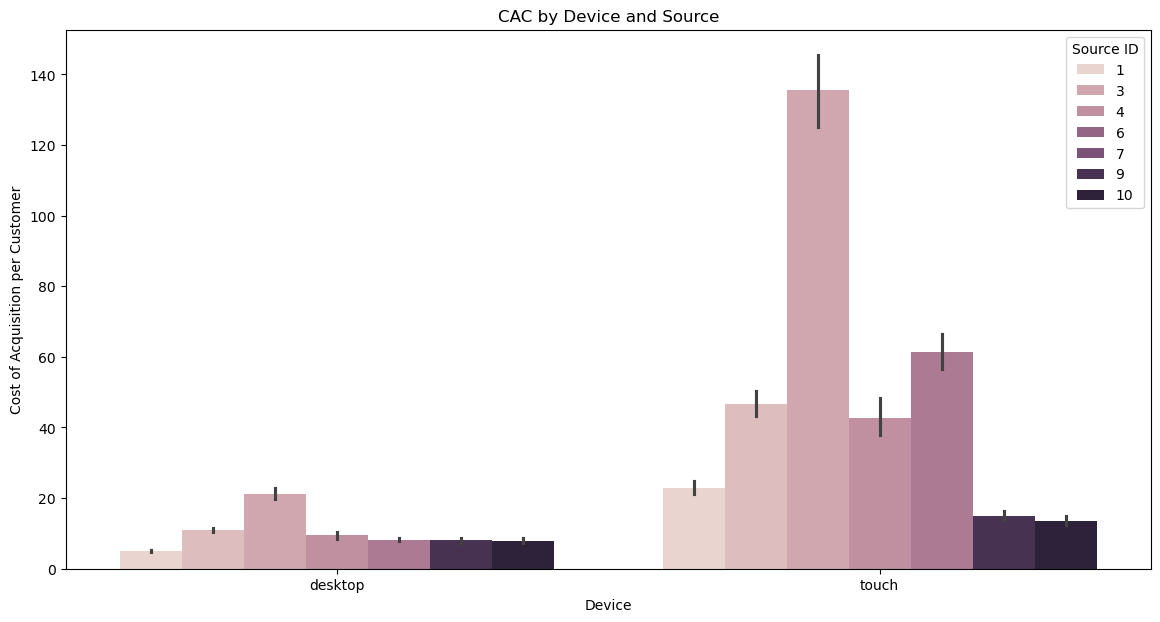

In [46]:
# Visualización del CAC
plt.figure(figsize=(14, 7))
sns.barplot(data=analysis_data, x='device', y='CAC', hue='source_id')
plt.title('CAC by Device and Source')
plt.xlabel('Device')
plt.ylabel('Cost of Acquisition per Customer')
plt.legend(title='Source ID')
plt.show()



**Notas:** El análisis del CAC por dispositivo revela que adquirir clientes desde dispositivos móviles (touch) es considerablemente más costoso que desde computadoras (desktop) en todos los canales de adquisición analizados. El caso más extremo es el Source ID 4, con un CAC superior a $130 USD en móvil, lo que representa una inversión muy elevada por cliente. Por otro lado, los canales 9 y 10 presentan un CAC bajo tanto en desktop como en touch, lo que los convierte en opciones atractivas desde una perspectiva de eficiencia. Esta información es fundamental para revisar y optimizar la estrategia de marketing móvil, priorizando los canales con mejor relación costo-beneficio según el tipo de dispositivo.

In [47]:
# Calcular el revenue total por dispositivo
revenue_per_device = analysis_data.groupby('device')['revenue'].sum().reset_index()

# Mostrar el resultado
print(revenue_per_device)

    device    revenue
0  desktop  247078.23
1    touch   40955.90


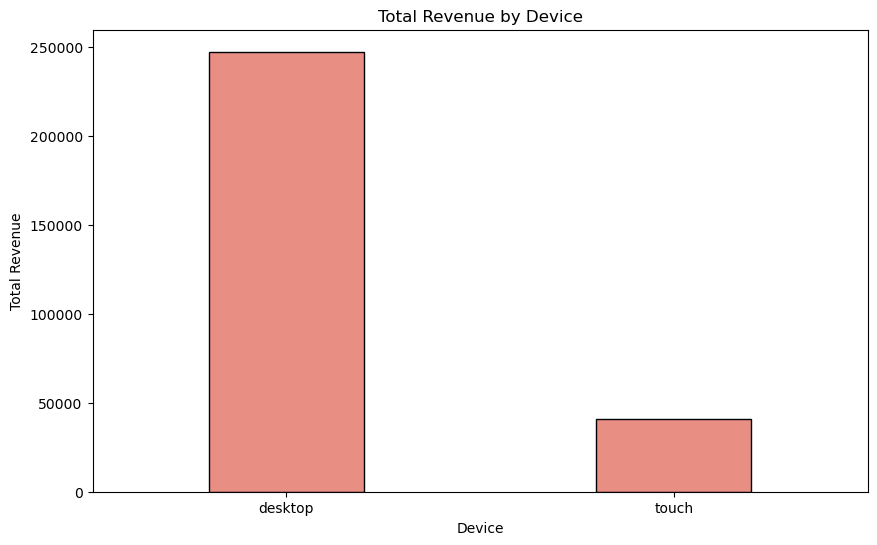

In [48]:

# Graficar el revenue total por dispositivo
plt.figure(figsize=(10, 6))
sns.barplot(x='device', y='revenue', data=revenue_per_device, width=0.4, color='salmon', edgecolor='black')
plt.title('Total Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Total Revenue')
plt.show()

**Notas:** El análisis del ingreso total por dispositivo revela que la mayoría de los ingresos provienen de usuarios que utilizan computadoras de escritorio (desktop), quienes generaron más de $240,000 USD, en comparación con solo $40,000 USD generados desde dispositivos móviles (touch). Esta brecha, combinada con el hecho de que el CAC en móviles es significativamente más alto, indica que los dispositivos de escritorio son mucho más rentables para la empresa.

## Conclusión

### Recomendaciones Estratégicas para la Inversión en Marketing Digital:

- Evaluación de Dispositivos: Desktop vs. Touch

Observación: Los dispositivos de escritorio generan significativamente más ingresos que los dispositivos táctiles. 

Recomendación: Incrementar la inversión en marketing para dispositivos de escritorio y mejorar la experiencia de usuario en dispositivos táctiles para aumentar su conversión.


- Análisis de Fuentes de Marketing

Fuente 3 (Alto CAC en dispositivos táctiles): Evaluar detalladamente el valor del ciclo de vida del cliente (LTV) para determinar si los costos altos se justifican a largo plazo.

Fuentes 9 y 10 (Bajo CAC): Estas fuentes muestran una eficiencia de costos prometedora. Considerar aumentar la inversión en estas fuentes después de validar que los clientes adquiridos mantienen un LTV alto.

Recomendación: Considerar reasignar parte del presupuesto de la fuente 3 a las fuentes 9 y 10 si el análisis de LTV no justifica los altos costos de CAC. También es vital realizar un análisis de seguimiento para asegurarse de que estos clientes no solo son baratos de adquirir sino que también son valiosos a largo plazo.


- Estrategias Basadas en el Retorno de la Inversión (ROMI)

Observación: Variabilidad significativa en el ROMI, incluyendo numerosos valores negativos.

Recomendación: Realizar una auditoría de marketing para identificar las causas de un ROMI bajo y realizar ajustes en las estrategias, incluyendo la mejora de la segmentación de audiencia, optimización de mensajes, y revisión de los funnels de conversión.


- Estas recomendaciones están diseñadas para maximizar la efectividad del marketing digital al enfocarse en dispositivos y fuentes que no solo reducen costos sino que también maximizan los ingresos y la retención de clientes a largo plazo. Se recomienda implementar un sistema de seguimiento y análisis continuo para adaptar y optimizar las estrategias de marketing basadas en datos y rendimiento real.